# ntpl001_staff
Write and read tabular data with RNTuple.  Adapted from the cernbuild and cernstaff tree tutorials.
Illustrates the type-safe ntuple model interface, which is used to define a data model that is in a second step
taken by an ntuple reader or writer.




**Author:** The ROOT Team  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:24 AM.</small></i>

In [1]:
%%cpp -d
#include <ROOT/RNTupleModel.hxx>
#include <ROOT/RNTupleReader.hxx>
#include <ROOT/RNTupleWriter.hxx>

#include <TCanvas.h>
#include <TH1I.h>
#include <TROOT.h>
#include <TString.h>

#include <cassert>
#include <cstdio>
#include <fstream>
#include <iostream>
#include <memory>
#include <string>
#include <sstream>
#include <utility>

using RNTupleModel = ROOT::Experimental::RNTupleModel;
using RNTupleReader = ROOT::Experimental::RNTupleReader;
using RNTupleWriter = ROOT::Experimental::RNTupleWriter;

constexpr char const* kNTupleFileName = "ntpl001_staff.root";

 NOTE: The RNTuple classes are experimental at this point.
Functionality, interface, and data format is still subject to changes.
Do not use for real data!
Import classes from experimental namespace for the time being
 

In [2]:
%%cpp -d
void Ingest() {
   // The input file cernstaff.dat is a copy of the CERN staff data base from 1988
   ifstream fin(gROOT->GetTutorialDir() + "/tree/cernstaff.dat");
   assert(fin.is_open());

   // We create a unique pointer to an empty data model
   auto model = RNTupleModel::Create();

   // To define the data model, we create fields with a given C++ type and name.  Fields are roughly TTree branches.
   // MakeField returns a shared pointer to a memory location that we can populate to fill the ntuple with data
   auto fldCategory = model->MakeField<int>("Category");
   auto fldFlag     = model->MakeField<unsigned int>("Flag");
   auto fldAge      = model->MakeField<int>("Age");
   auto fldService  = model->MakeField<int>("Service");
   auto fldChildren = model->MakeField<int>("Children");
   auto fldGrade    = model->MakeField<int>("Grade");
   auto fldStep     = model->MakeField<int>("Step");
   auto fldHrweek   = model->MakeField<int>("Hrweek");
   auto fldCost     = model->MakeField<int>("Cost");
   auto fldDivision = model->MakeField<std::string>("Division");
   auto fldNation   = model->MakeField<std::string>("Nation");

   // We hand-over the data model to a newly created ntuple of name "Staff", stored in kNTupleFileName
   // In return, we get a unique pointer to an ntuple that we can fill
   auto ntuple = RNTupleWriter::Recreate(std::move(model), "Staff", kNTupleFileName);

   std::string record;
   while (std::getline(fin, record)) {
      std::istringstream iss(record);
      iss >> *fldCategory >> *fldFlag >> *fldAge >> *fldService >> *fldChildren >> *fldGrade >> *fldStep >> *fldHrweek
          >> *fldCost >> *fldDivision >> *fldNation;
      ntuple->Fill();
   }

   // The ntuple unique pointer goes out of scope here.  On destruction, the ntuple flushes unwritten data to disk
   // and closes the attached ROOT file.
}

 Definition of a helper function: 

In [3]:
%%cpp -d
void Analyze() {
   // Get a unique pointer to an empty RNTuple model
   auto model = RNTupleModel::Create();

   // We only define the fields that are needed for reading
   std::shared_ptr<int> fldAge = model->MakeField<int>("Age");

   // Create an ntuple and attach the read model to it
   auto ntuple = RNTupleReader::Open(std::move(model), "Staff", kNTupleFileName);

   // Quick overview of the ntuple and list of fields.
   ntuple->PrintInfo();

   std::cout << "The first entry in JSON format:" << std::endl;
   ntuple->Show(0);
   // In a future version of RNTuple, there will be support for ntuple->Scan()

   auto c = new TCanvas("c", "", 200, 10, 700, 500);
   TH1I h("h", "Age Distribution CERN, 1988", 100, 0, 100);
   h.SetFillColor(48);

   for (auto entryId : *ntuple) {
      // Populate fldAge
      ntuple->LoadEntry(entryId);
      h.Fill(*fldAge);
   }

   h.DrawCopy();
}

In [4]:
Ingest();
Analyze();

************************************ NTUPLE ************************************
* N-Tuple : Staff                                                              *
* Entries : 3354                                                               *
********************************************************************************
* Field 1    : Category (std::int32_t)                                         *
* Field 2    : Flag (std::uint32_t)                                            *
* Field 3    : Age (std::int32_t)                                              *
* Field 4    : Service (std::int32_t)                                          *
* Field 5    : Children (std::int32_t)                                         *
* Field 6    : Grade (std::int32_t)                                            *
* Field 7    : Step (std::int32_t)                                             *
* Field 8    : Hrweek (std::int32_t)                                           *
* Field 9    : Cost (std::in

Warning in <[ROOT.NTuple] Warning /home/sftnight/build/workspace/root-makedoc-master/rootspi/rdoc/src/master/tree/ntuple/v7/src/RPageStorageFile.cxx:56 in ROOT::Experimental::Internal::RPageSinkFile::RPageSinkFile(std::string_view, const ROOT::Experimental::RNTupleWriteOptions&)::<lambda()>>: The RNTuple file format will change. Do not store real data with this version of RNTuple!
Warning in <[ROOT.NTuple] Warning /home/sftnight/build/workspace/root-makedoc-master/rootspi/rdoc/src/master/tree/ntuple/v7/src/RPageStorageFile.cxx:262 in ROOT::Experimental::Internal::RPageSourceFile::InitDescriptor(const ROOT::Experimental::RNTuple&)::<lambda()>>: Pre-release format version: RC 2


Draw all canvases 

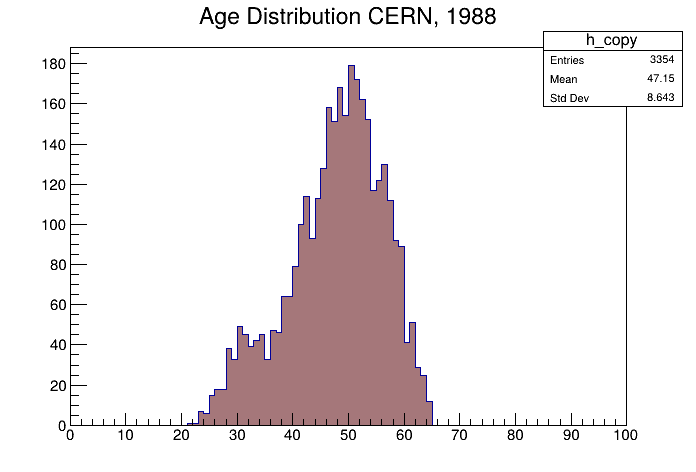

In [5]:
gROOT->GetListOfCanvases()->Draw()